In [1]:
import os, re
import numpy as np

In [2]:
data_set_path = re.sub('Algorithm', 'Dataset'+os.sep+'insurance.csv', os.getcwd())

In [3]:
data_set = np.loadtxt(data_set_path, delimiter=',', skiprows=1, usecols=[1,2])

In [4]:
data_set.shape

(63, 2)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
data_set = StandardScaler().fit_transform(data_set)

In [5]:
import matplotlib.pyplot as plt

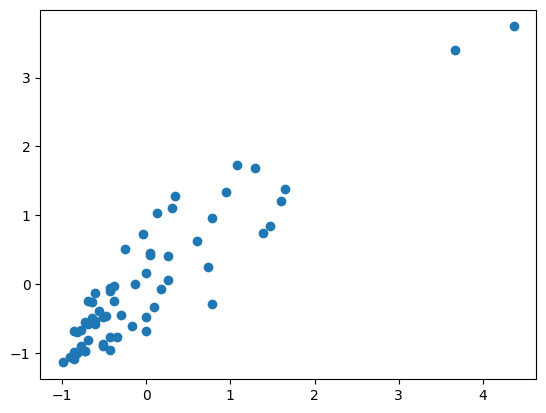

In [9]:
def plot():
    plt.scatter(data_set[:,0], data_set[:,1])
    
plot()

In [13]:
np.random.shuffle(data_set)

In [14]:
slope = 0.0
intercept = 0.0

In [15]:
def predict(x):
    return slope * x + intercept

In [16]:
def loss():
    x = data_set[:,0]
    y = data_set[:,1]
    n = x.size
    
    loss = 0
    for xi,yi in zip(x,y):
        loss += (predict(xi) - yi) ** 2
    return loss / n

In [17]:
loss()

1.0000000000000004

In [20]:
def step_slope(i: int):
    xi = data_set[i,0]
    yi = data_set[i,1]
    
    return 2 * (predict(xi) - yi) * xi

In [21]:
def step_intercept(i: int):
    xi = data_set[i,0]
    yi = data_set[i,1]
    
    return 2 * (predict(xi) - yi)

In [22]:
slope = slope - 0.01 * step_slope(0)
intercept = intercept - 0.01 * step_intercept(0)

In [23]:
loss()

0.988585868936463

In [24]:
slope = slope - 0.01 * step_slope(1)
intercept = intercept - 0.01 * step_intercept(1)

In [26]:
loss() # We try to optimise only with respect to a single data point

0.9967126280245675

In [31]:
for i in range(2,data_set.shape[0]):
    slope = slope - 0.01 * step_slope(i)
    intercept = intercept - 0.01 * step_intercept(i)

In [32]:
loss()

0.21604248876770227

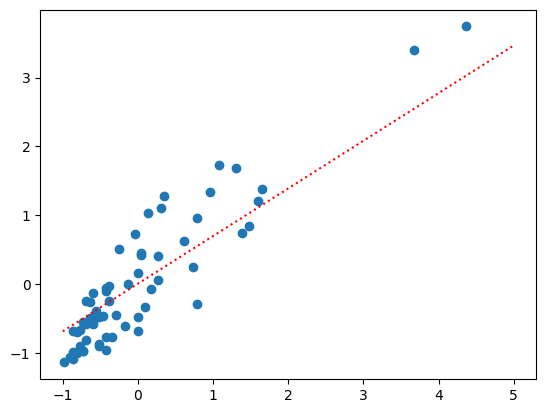

In [33]:
def plot():
    plt.scatter(data_set[:,0], data_set[:,1])
    plt.plot(range(-1,6), [predict(x) for x in range(-1,6)], 'r:')
    
plot()

In [34]:
# But, from Batch Gradient Descent we know we can reduce the loss function to 0.166
# so we will repeat this iteration one more time
np.random.shuffle(data_set)

for i in range(data_set.shape[0]):
    slope = slope - 0.01 * step_slope(i)
    intercept = intercept - 0.01 * step_intercept(i)

In [35]:
loss()

0.17175477428875305

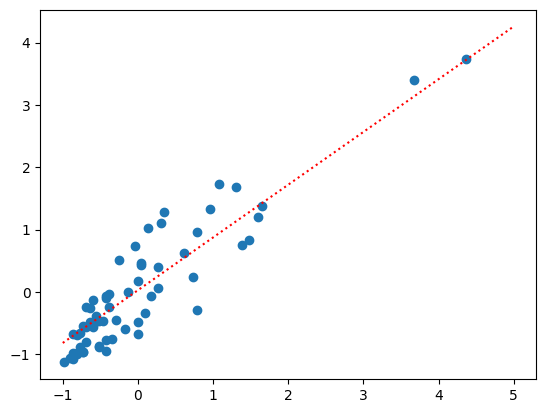

In [36]:
plot()

In [37]:
# Now, let's iterate one more time...
np.random.shuffle(data_set)

for i in range(data_set.shape[0]):
    slope = slope - 0.01 * step_slope(i)
    intercept = intercept - 0.01 * step_intercept(i)

In [38]:
loss()

0.16674177868172094

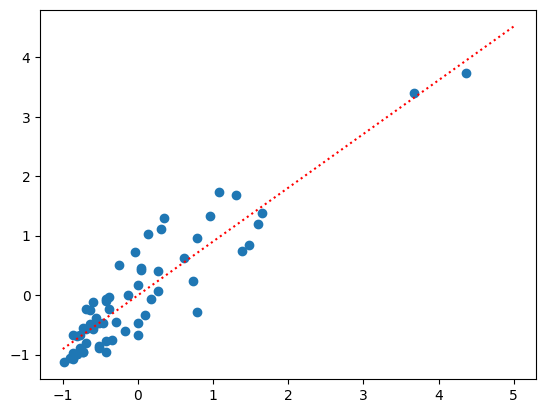

In [39]:
plot()

Thus, with just 3 iteration over the dataset we have find the optimal value for slope and intercept whereas in *Batch Gradient Descent* it took 2 iteration over the dataset for a single step and we perform a few hundred steps to each the optimal value.